In [ ]:

import random
random.seed(0)

import numpy as np
np.random.seed(0)

import tensorflow as tf
tf.random.set_seed(0)

In [ ]:
 from tensorflow.keras import datasets,layers,models
 import matplotlib.pyplot as plt

In [ ]:

fashion_mnist=datasets.fashion_mnist
(train_images,train_labels),(test_images,test_labels)=fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:

type(train_images)

numpy.ndarray

In [ ]:

type(train_labels)

numpy.ndarray

In [ ]:

print(len(train_images))

60000


In [ ]:
print(len(train_labels))

60000


In [ ]:
print(len(test_images))

10000


In [ ]:
#28*28 images
print(train_images[0].shape)

(28, 28)


In [ ]:

print(train_images[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1   1   0 200 232 23

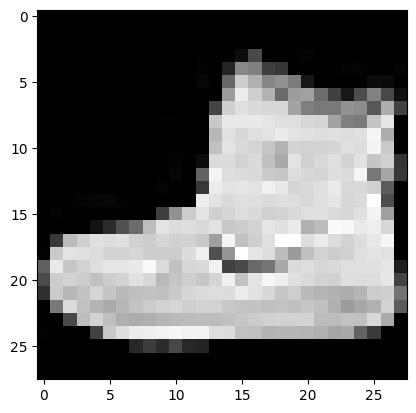

In [ ]:

plt.imshow(train_images[0],cmap='gray')
plt.show()

#class_names=['tshirt/top','trouser','pullover','dress','coat','sandal','shirt','sneaker','bag','ankle boot']
### #indexing starts from 0 italicized text

In [ ]:
print(train_labels[0])


9


In [ ]:
#normalizing the pixel values to be between 0 and 1
train_images,test_images=train_images/ 255.0 ,test_images/ 255.0

In [ ]:
print(train_images[0])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.00392157 0.    

In [ ]:
#reshaping the image sto specify that it is a single channel(gray scale) else RGB means 3 channels
train_images=train_images.reshape((train_images.shape[0],28,28,1))
test_images=test_images.reshape((test_images.shape[0],28,28,1))

In [ ]:
train_images.shape

(60000, 28, 28, 1)

Convolutional Neural Network

In [ ]:
#building the convolutional base
model = models.Sequential()
#stack layers one over another
model.add(layers.Conv2D(32,(3,3),activation='relu',input_shape=(28,28,1))) # 32 no of filters
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3),activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3),activation='relu'))

#Adding Dense Layers on Top
#classifies image
#atlast we get 3*3 array so that it flattens to 1d array
model.add(layers.Flatten())
model.add(layers.Dense(64,activation='relu'))#default activation function that is linear
model.add(layers.Dense(10))















/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
 model.compile(optimizer='adam',
 loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
               metrics=['accuracy'])

In [ ]:
history=model.fit(train_images,train_labels,epochs=5,
                  validation_data=(test_images,test_labels))

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 26s 7ms/step - accuracy: 0.7497 - loss: 0.6936 - val_accuracy: 0.8701 - val_loss: 0.3629
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 27s 5ms/step - accuracy: 0.8775 - loss: 0.3355 - val_accuracy: 0.8834 - val_loss: 0.3238
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.8964 - loss: 0.2831 - val_accuracy: 0.8854 - val_loss: 0.3121
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9084 - loss: 0.2477 - val_accuracy: 0.8976 - val_loss: 0.2832
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.9185 - loss: 0.2186 - val_accuracy: 0.8946 - val_loss: 0.2957


In [ ]:
#evaluate the model
test_loss,test_acc=model.evaluate(test_images,test_labels,verbose=2)
print('\nTest accuracy:',test_acc)


313/313 - 1s - 2ms/step - accuracy: 0.8946 - loss: 0.2957

Test accuracy: 0.894599974155426


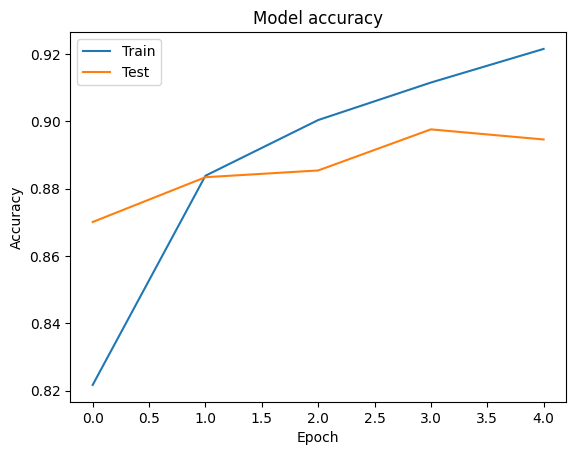

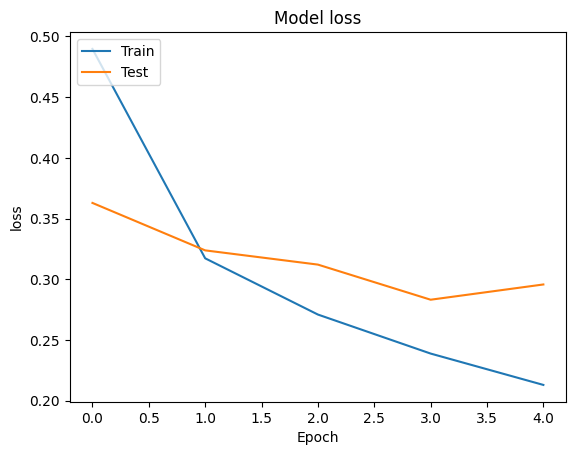

In [ ]:
#ploting training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train','Test'],loc='upper left')
plt.show()

#ploting training a nd validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('Epoch')
plt.legend(['Train','Test'],loc='upper left')
plt.show()

In [ ]:
model.save('trained_fashion_mnist.h5')